In [1]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import vaalianalyysi as va

In [2]:
e19 = va.data.tulospalvelu.vaalit("EKV-2019")
e23 = va.data.tulospalvelu.vaalit("EKV-2023")

In [3]:
puolueet = e23.puoluetunnukset(["SDP", "KOK", "KESK", "PS", "VIHR", "RKP", "KD", "VAS", "LIIK"])
alueet = va.data.tulospalvelu.Vaalit.aluevastaavuudet(e19, e23)
v19 = e19.v(alueet, puolueet)
v23 = e23.v(alueet, puolueet)
n19 = e19.n(alueet)
n23 = e23.n(alueet)

In [4]:
r19 = v19 / n19
r23 = v23 / n23
dr = 100 * (r23 - r19)

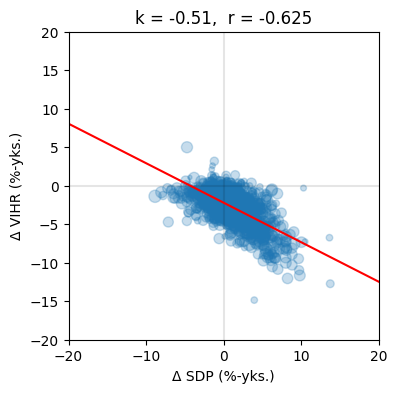

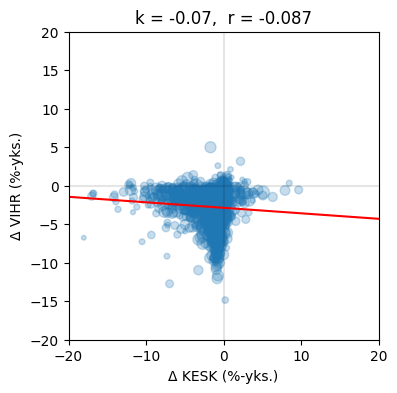

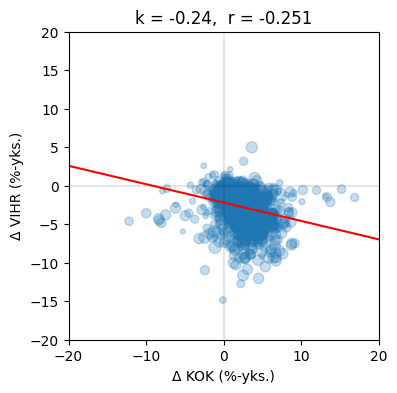

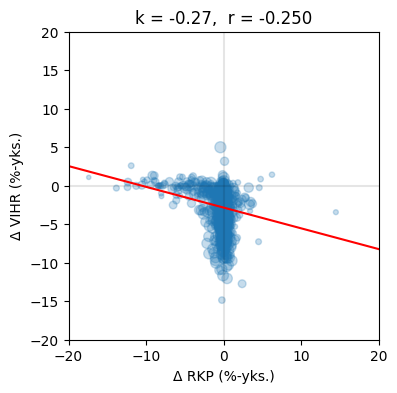

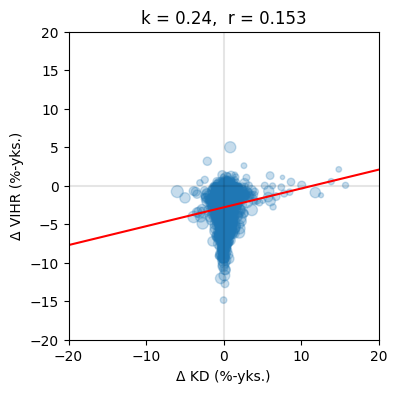

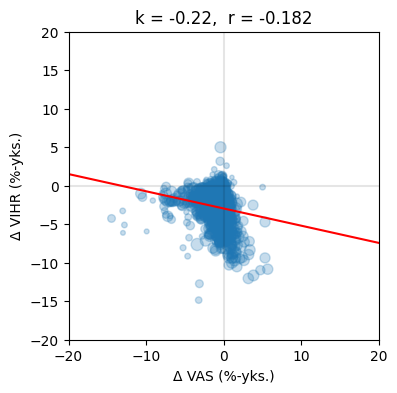

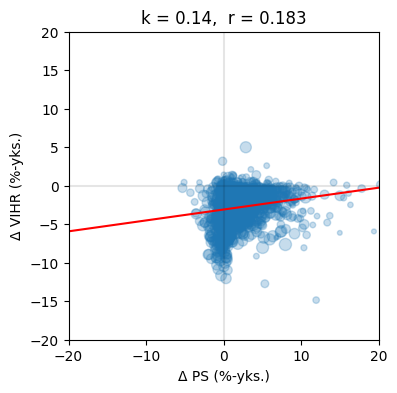

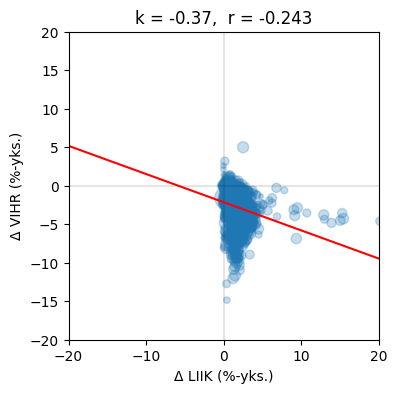

In [11]:
j = puolueet.index(e23.puoluetunnukset(["VIHR"])[0])
for puolue in puolueet:
    i = puolueet.index(puolue)
    if i != j:
        plt.figure(figsize=(4, 4))
        pi = e23.puolueet[puolueet[i]].nimilyhenne_suomeksi
        pj = e23.puolueet[puolueet[j]].nimilyhenne_suomeksi
        x = dr[i,:]
        y = dr[j,:]
        s = 1.0 * np.sqrt(n19)
        plt.axhline(y=0, color="k", alpha=0.10)
        plt.axvline(x=0, color="k", alpha=0.10)
        plt.scatter(x, y, s, alpha=0.25)
        k, c, r, _, _ = scipy.stats.linregress(x, y)
        plt.title(f"k = {k:.2f},  r = {r:.3f}")
        plt.plot([-20, 20], k * np.array([-20, 20]) + c, color="red")
        plt.xlabel(f"Δ {pi} (%-yks.)")
        plt.ylabel(f"Δ {pj} (%-yks.)")
        plt.xlim(-20, 20)
        plt.ylim(-20, 20)
        plt.show()